In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_weather = pd.read_csv(r"C:\Users\ilham\OneDrive\Desktop\Documents\dataset\file.csv")

In [3]:
df_weather.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df_weather.shape

(8784, 8)

In [5]:
df_weather.index

RangeIndex(start=0, stop=8784, step=1)

In [6]:
df_weather.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [7]:
df_weather.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [9]:
df_weather.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

## Apa tanggal dan waktu pengamatan cuaca terakhir?

In [10]:
df_weather.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [11]:
df_weather['Date/Time'].tail(1)

8783    12/31/2012 23:00
Name: Date/Time, dtype: object

## Pada bulan apa pengamatan cuaca paling sering dilakukan?

In [12]:
df_weather['Date/Time'] = pd.to_datetime(df_weather['Date/Time'])

In [13]:
df_weather['Month'] = df_weather['Date/Time'].dt.month

In [14]:
most_frequent_month = df_weather['Month'].value_counts().idxmax()

In [15]:
import calendar
most_frequent_month_name = calendar.month_name[most_frequent_month]

print("Pengamatan cuaca paling sering dilakukan pada bulan:", most_frequent_month_name)

Pengamatan cuaca paling sering dilakukan pada bulan: January


## Adakah pola khusus dalam perubahan cuaca berdasarkan hari dalam seminggu?

In [16]:
df_weather['Date/Time'] = pd.to_datetime(df_weather['Date/Time'])

In [17]:
df_weather['Weekday'] = df_weather['Date/Time'].dt.dayofweek

In [18]:
df_weather['Weekday']

0       6
1       6
2       6
3       6
4       6
       ..
8779    0
8780    0
8781    0
8782    0
8783    0
Name: Weekday, Length: 8784, dtype: int64

In [19]:
day_names = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}

In [20]:
df_weather['Weekday'] = df_weather['Weekday'].map(day_names)

In [21]:
average_weather_by_weekday = df_weather.groupby('Weekday').mean(numeric_only=True)

In [22]:
average_weather_by_weekday

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Month
Weekday,,,,,,,
Jumat,9.353766,3.257772,68.695513,15.500801,26.673157,100.963446,6.538462
Kamis,9.456731,3.337179,67.767628,15.044872,27.582933,101.080657,6.519231
Minggu,7.854560,1.241824,65.609277,14.935535,30.006289,101.187500,6.509434
Rabu,8.806891,3.029728,69.239583,13.608974,25.699199,101.073758,6.480769
Sabtu,8.388622,1.535657,65.132212,15.185096,28.667067,101.077051,6.576923
Selasa,8.889583,3.159135,69.260417,14.628205,25.884936,100.968974,6.442308
Senin,8.853931,2.354874,66.372642,15.700472,29.065566,101.008200,6.528302


## Berapa rata-rata suhu dalam Celsius selama periode pengamatan?

In [23]:
df_weather['Temp_C'].mean()

8.798144353369764

## Kapan suhu terendah dan tertinggi terjadi selama periode pengamatan?

In [24]:
suhu_tinggi = df_weather.sort_values(by='Temp_C', ascending = False)
suhu_tinggi['Temp_C'].head(1)

4695    33.0
Name: Temp_C, dtype: float64

In [25]:
suhu_rendah = df_weather.sort_values(by='Temp_C', ascending = True)
suhu_rendah['Temp_C'].head(1)

344   -23.3
Name: Temp_C, dtype: float64

## Apakah ada korelasi antara suhu dan kecepatan angin?

In [26]:
korelasi = df_weather['Temp_C'].corr(df_weather['Wind Speed_km/h'])
korelasi

-0.06187600256982035

## Apakah ada hubungan antara kecepatan angin dan tekanan atmosfer?

In [27]:
correlation = df_weather['Wind Speed_km/h'].corr(df_weather['Press_kPa'])
correlation

-0.35661310354581344

## Perubahan Cuaca Seiring Waktu

In [28]:
df_weather['Date/Time'] = pd.to_datetime(df_weather['Date/Time'])

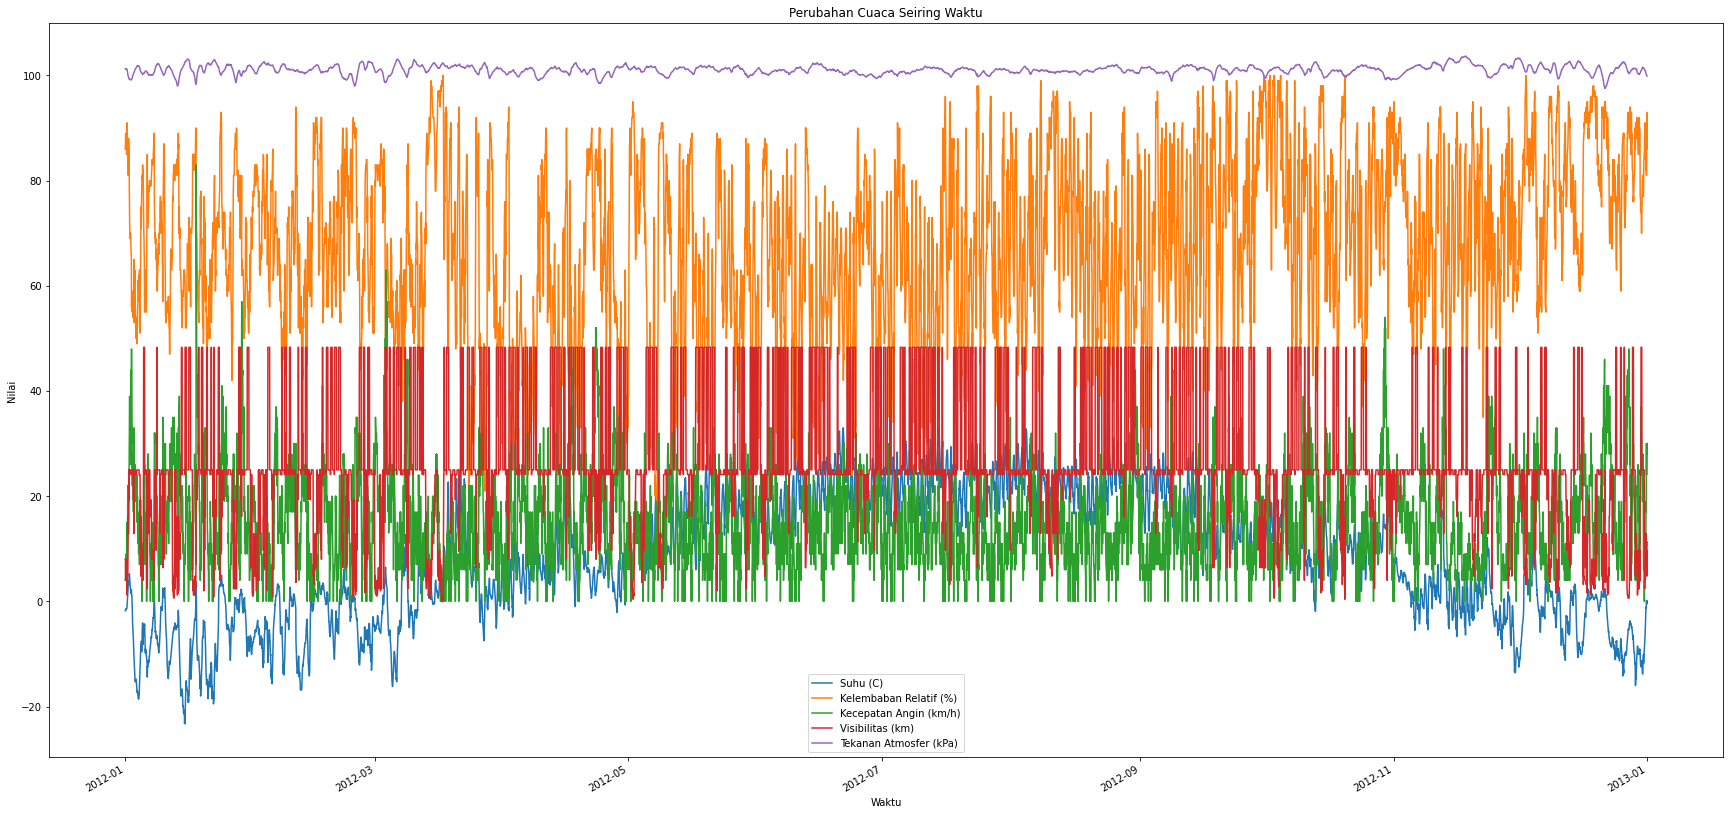

In [29]:
plt.figure(figsize=(30, 15))

plt.plot(df_weather['Date/Time'], df_weather['Temp_C'], label='Suhu (C)')
plt.plot(df_weather['Date/Time'], df_weather['Rel Hum_%'], label='Kelembaban Relatif (%)')
plt.plot(df_weather['Date/Time'], df_weather['Wind Speed_km/h'], label='Kecepatan Angin (km/h)')
plt.plot(df_weather['Date/Time'], df_weather['Visibility_km'], label='Visibilitas (km)')
plt.plot(df_weather['Date/Time'], df_weather['Press_kPa'], label='Tekanan Atmosfer (kPa)')

plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()

plt.gcf().autofmt_xdate()
plt.title('Perubahan Cuaca Seiring Waktu')
plt.show()

## Hubungan antara kecepatan angin dan tekanan atmosfer

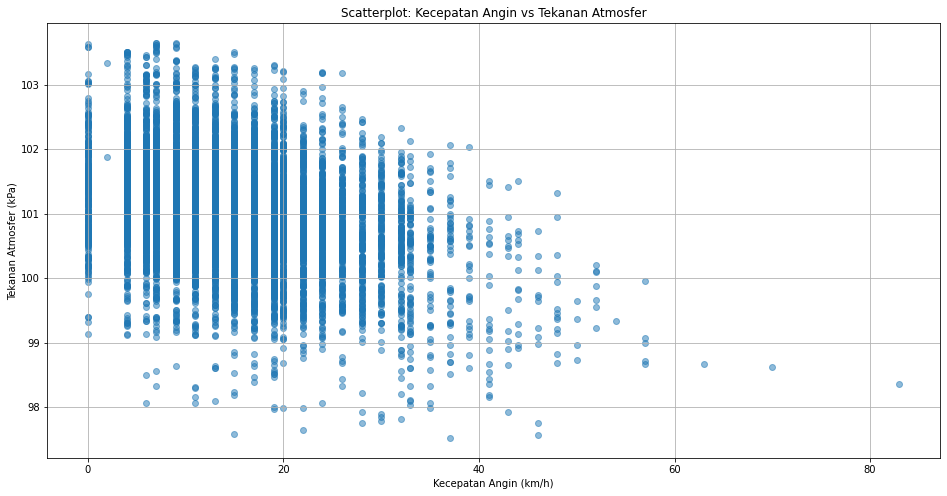

In [30]:
# Plotting scatterplot
plt.figure(figsize=(16, 8))

plt.scatter(df_weather['Wind Speed_km/h'], df_weather['Press_kPa'], alpha=0.5)

plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Tekanan Atmosfer (kPa)')

plt.title('Scatterplot: Kecepatan Angin vs Tekanan Atmosfer')

plt.grid(True)
plt.show()